<a href="https://colab.research.google.com/github/shubh45-nandan/CNN_BASELINE_MODLES_FOR_CRC/blob/main/DENSENET121_BASELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Libraries imported
Mounted at /content/drive
✅ Unzipped to: /content/Extracted_From_Zip
📂 Dataset root detected at: /content/Extracted_From_Zip/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000

📚 Classes & counts:
  - 01_TUMOR: 625 images
  - 02_STROMA: 625 images
  - 03_COMPLEX: 625 images
  - 04_LYMPHO: 625 images
  - 05_DEBRIS: 625 images
  - 06_MUCOSA: 625 images
  - 07_ADIPOSE: 625 images
  - 08_EMPTY: 625 images

✅ Stratified Split Completed: {'train': 3248, 'val': 1000, 'test': 752}
Found 3248 images belonging to 8 classes.
Found 1000 images belonging to 8 classes.
Found 752 images belonging to 8 classes.

✅ Detected 8 classes: ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,699,784 (29.37 MB)

 Trainable params: 660,232 (2.52 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.3308 - loss: 2.0725
Epoch 1: val_accuracy improved from -inf to 0.71600, saving model to /content/best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 113s 811ms/step - accuracy: 0.3319 - loss: 2.0682 - val_accuracy: 0.7160 - val_loss: 1.1634 - learning_rate: 1.0000e-04
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.6534 - loss: 1.0150
Epoch 2: val_accuracy improved from 0.71600 to 0.80200, saving model to /content/best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 454ms/step - accuracy: 0.6537 - loss: 1.0146 - val_accuracy: 0.8020 - val_loss: 0.8100 - learning_rate: 1.0000e-04
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.7479 - loss: 0.7944
Epoch 3: val_accuracy improved from 0.80200 to 0.81300, saving model to /content/best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 80s 430ms/step - accuracy: 0.7480 - loss: 0.7941 - val_accuracy: 0.8130 - val_loss: 0.6732 - learning_rate: 1.0000e-04


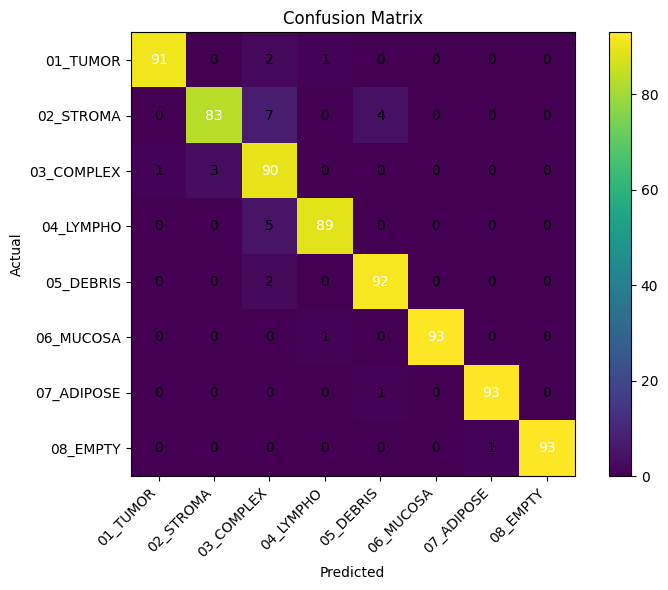

✅ Saved Model: /content/densenet121_colorectal_finetuned.keras


In [ ]:
# ✅ Imports
import os, shutil, random, zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

print("✅ Libraries imported")

# Mount Google Drive

try:
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive', force_remount=True)
    IN_COLAB = True
except Exception:
    print("⚠️ Not running in Colab (Drive mount skipped).")
    IN_COLAB = False


# 📦 User Config

ZIP_IN_DRIVE = "/content/drive/MyDrive/archive.zip"  # <-- Change path if needed

SEED        = 42
VAL_RATIO   = 0.20
TEST_RATIO  = 0.15
IMG_SIZE    = (224, 224)
BATCH_SIZE  = 32
EPOCHS_FROZEN   = 15
EPOCHS_FINETUNE = 25
LEARNING_RATE   = 1e-4

EXTRACT_DIR  = "/content/Extracted_From_Zip"
SPLIT_ROOT   = "/content/dataset_split"
TRAIN_DIR    = os.path.join(SPLIT_ROOT, "train")
VAL_DIR      = os.path.join(SPLIT_ROOT, "val")
TEST_DIR     = os.path.join(SPLIT_ROOT, "test")

EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# -------------------------
# 🗜️ Unzip
# -------------------------
def safe_unzip(zip_path, dest_dir):
    if not os.path.exists(zip_path):
        raise FileNotFoundError(f"❌ ZIP not found at: {zip_path}")
    if os.path.exists(dest_dir):
        shutil.rmtree(dest_dir)
    os.makedirs(dest_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zf:
        zf.extractall(dest_dir)
    print(f"✅ Unzipped to: {dest_dir}")

# -------------------------
# 🔎 Detect dataset root
# -------------------------
def list_images_recursive(folder):
    out = []
    for root, _, files in os.walk(folder):
        for fn in files:
            if os.path.splitext(fn)[1].lower() in EXTS:
                out.append(os.path.join(root, fn))
    return out

def find_dataset_root(base):
    best_dir, best_score = base, -1
    for root, dirs, _ in os.walk(base):
        score = 0
        for d in dirs:
            dpath = os.path.join(root, d)
            imgs = [f for f in os.listdir(dpath) if os.path.splitext(f)[1].lower() in EXTS]
            if not imgs:
                for rr, _, ff in os.walk(dpath):
                    if any(os.path.splitext(x)[1].lower() in EXTS for x in ff):
                        imgs = ff
                        break
            if imgs:
                score += 1
        if score > best_score:
            best_dir, best_score = root, score
    return best_dir

def allocate_counts(n, val_ratio=VAL_RATIO, test_ratio=TEST_RATIO):
    if n <= 0: return (0,0,0)
    test_n = max(1, int(round(n * test_ratio)))
    val_n  = max(1, int(round(n * val_ratio)))
    if test_n + val_n >= n:
        val_n, test_n = 1, 1
    train_n = n - val_n - test_n
    return train_n, val_n, test_n

def ensure_clean_dir(p):
    if os.path.exists(p):
        shutil.rmtree(p)
    os.makedirs(p, exist_ok=True)

# -------------------------
# 🚀 Extract & Split
# -------------------------
safe_unzip(ZIP_IN_DRIVE, EXTRACT_DIR)
DATASET_ROOT = find_dataset_root(EXTRACT_DIR)
print(f"📂 Dataset root detected at: {DATASET_ROOT}")

class_to_files = {}
for entry in sorted(os.listdir(DATASET_ROOT)):
    p = os.path.join(DATASET_ROOT, entry)
    if os.path.isdir(p):
        imgs = list_images_recursive(p)
        if imgs:
            class_to_files[entry] = sorted(imgs)

if not class_to_files:
    all_imgs = list_images_recursive(DATASET_ROOT)
    for fp in all_imgs:
        cls = os.path.basename(os.path.dirname(fp))
        class_to_files.setdefault(cls, []).append(fp)

available_classes = sorted(class_to_files.keys())
if len(available_classes) < 2:
    raise RuntimeError("❌ Need at least 2 classes!")

print("\n📚 Classes & counts:")
for c in available_classes:
    print(f"  - {c}: {len(class_to_files[c])} images")

ensure_clean_dir(SPLIT_ROOT)
ensure_clean_dir(TRAIN_DIR)
ensure_clean_dir(VAL_DIR)
ensure_clean_dir(TEST_DIR)

rng = np.random.default_rng(SEED)
totals = {"train":0,"val":0,"test":0}

for cls in available_classes:
    files = class_to_files[cls]
    idx = np.arange(len(files))
    rng.shuffle(idx)

    train_n, val_n, test_n = allocate_counts(len(files))
    train_idx = set(idx[:train_n])
    val_idx   = set(idx[train_n:train_n+val_n])
    test_idx  = set(idx[train_n+val_n:train_n+val_n+test_n])

    os.makedirs(os.path.join(TRAIN_DIR, cls), exist_ok=True)
    os.makedirs(os.path.join(VAL_DIR, cls), exist_ok=True)
    os.makedirs(os.path.join(TEST_DIR, cls), exist_ok=True)

    for i in idx:
        src = files[i]
        base = os.path.basename(src)
        if i in train_idx: dst = os.path.join(TRAIN_DIR, cls, base)
        elif i in val_idx: dst = os.path.join(VAL_DIR, cls, base)
        else:              dst = os.path.join(TEST_DIR, cls, base)
        shutil.copy2(src, dst)

    totals["train"] += train_n
    totals["val"]   += val_n
    totals["test"]  += test_n

print("\n✅ Stratified Split Completed:", totals)

# -------------------------
# 🔄 Data Generators
# -------------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.2, horizontal_flip=True, fill_mode="nearest"
)
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True
)
val_gen = val_test_datagen.flow_from_directory(
    VAL_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False
)
test_gen = val_test_datagen.flow_from_directory(
    TEST_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False
)

class_names = list(train_gen.class_indices.keys())
num_classes = len(class_names)
print(f"\n✅ Detected {num_classes} classes: {class_names}")

# -------------------------
# 🧠 Build Model
# -------------------------
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# -------------------------
# 🧷 Callbacks
# -------------------------
CKPT_PATH = "/content/best_model.keras"
callbacks_common = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1),
    ModelCheckpoint(CKPT_PATH, monitor='val_accuracy', save_best_only=True, verbose=1)
]

# -------------------------
# 🏋️ Phase 1: Base Frozen (15 epochs)
# -------------------------
history1 = model.fit(
    train_gen, validation_data=val_gen,
    epochs=EPOCHS_FROZEN, callbacks=callbacks_common, verbose=1
)

# -------------------------
# 🔓 Phase 2: Fine-tune (25 epochs)
# -------------------------
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# ✅ FIX: use .learning_rate and cast to native float
current_lr = float(tf.keras.backend.get_value(model.optimizer.learning_rate))
model.compile(
    optimizer=optimizers.Adam(learning_rate=current_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_finetune = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, verbose=1),
    ModelCheckpoint(CKPT_PATH, monitor='val_accuracy', save_best_only=True, verbose=1)
]

history2 = model.fit(
    train_gen, validation_data=val_gen,
    epochs=EPOCHS_FINETUNE, callbacks=callbacks_finetune, verbose=1
)

# -------------------------
# 🧾 Evaluation
# -------------------------
test_loss, test_acc = model.evaluate(test_gen, verbose=1)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen, verbose=0), axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right')
plt.yticks(tick_marks, class_names)
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# -------------------------
# 💾 Save Model
# -------------------------
FINAL_MODEL_PATH = "/content/densenet121_colorectal_finetuned.keras"
model.save(FINAL_MODEL_PATH)
print(f"✅ Saved Model: {FINAL_MODEL_PATH}")